# Uncertainty in Estimation
In the previous section, we took a detour into the philosophy of science and the logical ground upon which statistical inference is based. For the moment, we will put that discussion to one side and get back to our statistical model. As a reminder, the aim of our statistical model is to estimate *population quantities* from a sample. If we had the whole population available, there would be no need for inference and our job would be done. Given that this is almost never practical, we need some method for trying to say something about the population based on the information in the sample (even if this desire is logically flawed). In order to do so, we need to understand more about our estimates and, crucially, their uncertainty. This will allow us to judge whether we can *trust* the values we have calculated as good approximations of the population, allowing us to reach conclusions that we can try to generalise beyond this sample.

## Parameter Estimates as Random Variables

```{figure} images/darts-analogy.png
---
scale: 78%
align: right
---
```

The first characteristic of our estimates that we need to understand is that they are *random variables*. Remember that we conceptualise the population parameters as fixed. For every sample we draw from the population, we can use a method such as Maximum Likelihood to *estimate* those population constants. However, these estimates will change with every new sample we take. You can think of this like throwing darts at a dart board. If the bullseye represents the true population value, every time we take a sample and produce an estimate we are throwing a dart at the board. Sometimes we will hit the bullseyes, other times we might be close and other times we might be far away. Over time, a *distribution* of darts will emerge. If we are doing well, the hope is that most of our darts are close to the bullseye with fewer of them further away. 

Remembering back to earlier in this unit, a variable whose value changes every time we measure it is known as a *random variable*. As such, the parameter estimates can be characterised as random variables, meaning that each estimate is associated with some probability distribution that indicates:

1. What the *average* value of the estimate is across different samples (the expected value)
2. How much the value of the estimate will change across difference samples (the variance)

Ideally, these distributions would have a variance that is as *small* as possible so that the estimates do not change much from sample-to-sample. In addition, we would like these distributions to have a mean equal to the population value so that, on average, we are capturing the *true value*. In the dartboard analogy, we hope that most of our throws are close to the bullseye, with fewer throws further away. These two conditions are known as *efficiency* and *bias*. We desire estimates that are both *efficient* (minimal variance) and *unbiased* (mean is the true value). Unfortunately, there is a tension between these conditions known as the *bias-variance trade-off*, which we will explore later on the course. 

### Demonstration in `R`
Before getting into more detail, we can illustrate the idea of estimates being random variables in `R`. In the code below, we simulate 1,000 repeats of sampling 100 values from 

$$
y \sim \mathcal{N}\left(5,2\right)
$$

You can think of this as repeating the same experiment 1,000 times, where each repeat consists of a different sample of 100 subjects. Every time we perform the experiment, we calculate the sample mean as an estimate of the population mean $\mu$. Over the repeats, we build a collection of 1,000 estimated means $\left(\hat{\mu}_{1}, \hat{\mu}_{2}, \dots, \hat{\mu}_{1000}\right)$ that we can use to approximate the *distribution* of $\hat{\mu}$

In [1]:
options(repr.plot.width=12, repr.plot.height=7)

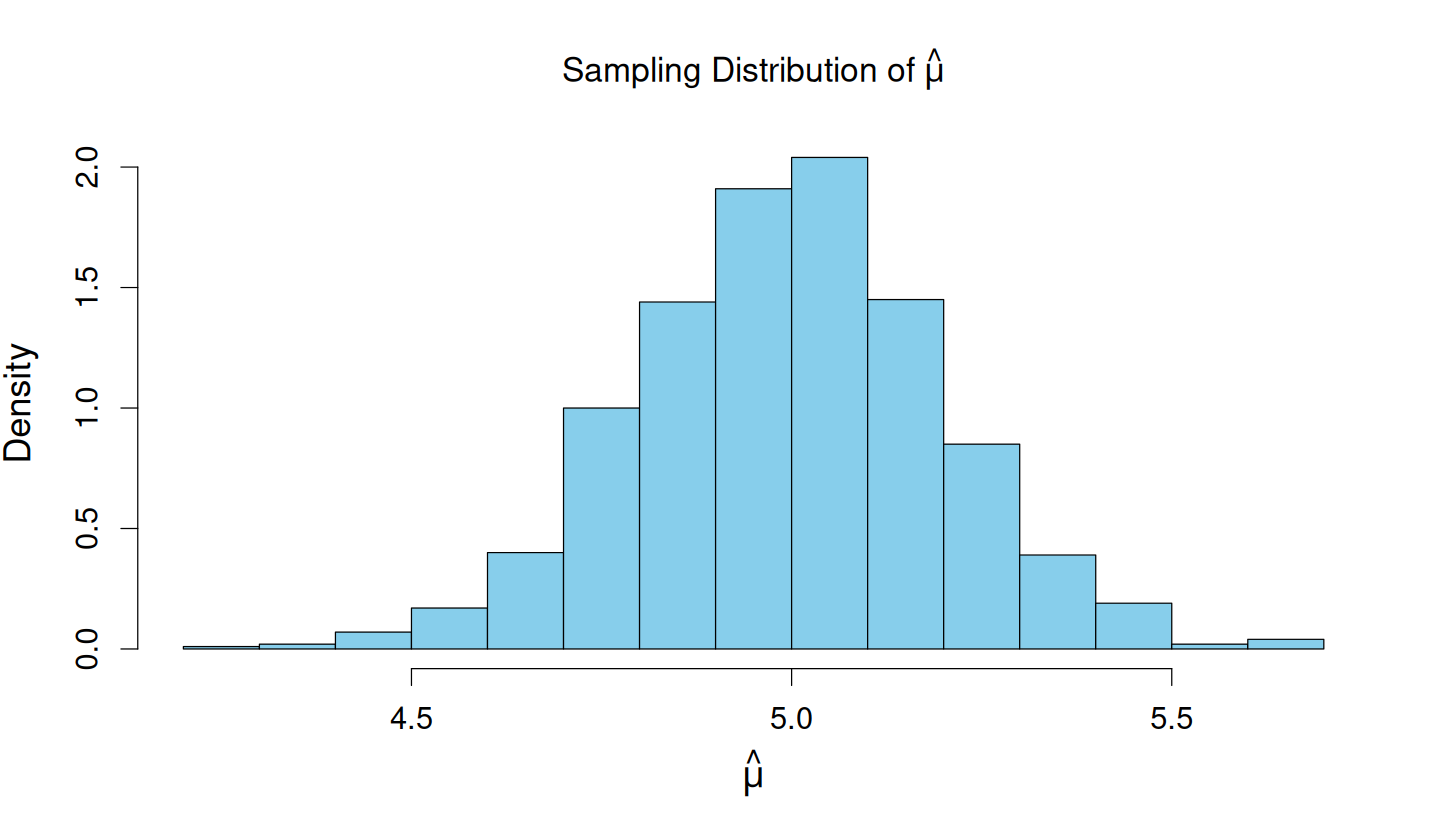

In [2]:
set.seed(999)

mu     <- 5             # True mean
sigma  <- 2             # True standard deviation
n.sims <- 1000          # Consider 1,000 different samples
n      <- 100           # Each sample will consist of 100 observations
mu.hat <- rep(0,n.sims) # Array for saving each estimate of mu

for (i in 1:n.sims){
    y         <- rnorm(n, mean=mu, sd=sigma) # Simulate a sample from the population
    mu.hat[i] <- mean(y)                     # Estimate mu and save it
}

# Histogram of the sampling distribution
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(mu.hat, 
    col="skyblue", 
    probability=TRUE, 
    main=expression("Sampling Distribution of " * hat(mu)), 
    xlab=expression(hat(mu)))

So we can see that $\hat{\mu}$ is indeed a random variable, with a distribution looks a lot like a normal distribution. In fact, it *is* a normal distribution, which is a consequence of assuming that the population distribution is normal. We can also examine the empirical[^empirfoot] mean and standard deviation of this distribution:

In [3]:
print(mean(mu.hat))
print(sd(mu.hat))

[1] 4.995861
[1] 0.2022037


Notice that the expected value is basically the true value of $\mu$, indicating that our estimate of the mean is *unbiased*. Notice, as well, that the standard deviation of the sampling distribution is *much smaller* than the standard deviation of the population distribution. This is an important point for inference, as we will discuss in more detail below.

## Sampling Distributions
The probability distributions of parameters estimates play a central role in statistical inference and so are given a special names. These are known as *sampling distributions*. So, we now have: 

- *Population distributions* - our theoretical data-generating process
- *Sampling distributions* - how quantities associated with the data-generating process change with each new sample. 

In the example above, the quantity that changed with each sample was a simple estimate of the mean. However, any value we can calculate from our sample that changes with each new sample is a random variable with a sampling distribution. For our current purpose, knowing the exact form of the sampling distribution is key because it tells us whether our estimate is biased, but also how *uncertain* we are about our estimated values. Because this characterisation of uncertainty is key for inference, the standard deviation of a sampling distribution is also given a special name: the *standard error*.

```{admonition} Standard Error vs Standard Deviation
:class: tip
Understanding what the standard error is, and how it differs from the standard deviation, is crucial because students often get these muddled. The standard deviation of a set of data represents the *raw variability* in that data. It is specific to that sample and indicates how far, on average, each data point is from the mean. The *standard error* is the theoretical variability of some estimate from that sample. This tells us how *precise* the estimate is likely to be, on average. The standard deviation is therefore most relevant for *descriptive statistics*, whereas the standard error is most relevant for *inferential statistics*.

If you are ever confused about which to use as error bars in plots, think about the *purpose* of the plot. As an example, if you were drawing a bar plot, think about what you want to represent about the top of the bar. If you want to indicate how much the data you have collected differs on average from the top of the bar, use the *standard deviation*. If you want to indicate how much the top of the bar is likely to change from sample-to-sample, use the *standard error*. The standard deviation is illustrating how good of a summary the top of the bar is for this one sample. The standard error is representing how accurate the top of the bar is as an estimate of the population value. In the standard deviation case, the focus is on the data moving around. In the standard error case, the focus is on the top of the bar moving around.
```

The idea of the sampling distribution is illustrated in {numref}`sampling-dist-fig`. Here, we conceptualise drawing $k$ samples of size $n$ from the same population distribution. Each sample provides an estimate of the mean. Based on this sample of estimates, we can build a distribution of the most probable values for $\hat{\mu}$ across repeated samples. This distribution is the *sampling distribution* of the estimate $\hat{\mu}$.

```{figure} images/sampling-dist.png
---
width: 700px
name: sampling-dist-fig
---
Illustration of the concept of a sampling distribution.
```

## Sampling Distributions in Linear Models
As indicated above, the exact form of the sampling distribution is key for making inference about our estimates. If we know both its expected value and standard error, we can judge how much to trust our estimates. A sampling distribution that is *biased* with a *large standard error* suggests that our estimates will be unreliable and we would need to be very cautious drawing conclusions. Alternatively, a sampling distribution that is *unbiased* with a *small standard error* suggests that our estimates are likely to be close to the true value, allowing greater confidence in reaching conclusions based on their value.

So what form do the sampling distributions taken within a linear model? We could derive the distributions empirically using simulations, as shown above. However, this is unnecessary if the assumptions about the population distribution hold. Given that, in the past, there were no computers for running simulations, it was historically essential that the sampling distribution could be derived mathematically. As it turns out, if we assume a normal population distribution, the sampling distributions of the slope and intercept parameters are *also* normal. This is one of the useful features of the normal distribution and is why it is so ubiquitous in statistics. 

To see how this works, we will use the following simple regression model as an example

$$
\begin{align*}
    y_{i} &= \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right).
\end{align*}
$$

For this model, statistical theory tells us that the sampling distribution of the slope estimate will be 

$$
\hat{\beta}_{1} \sim \mathcal{N}\left(\beta_{1},\frac{\sigma^{2}}{\sum{\left(x_{i} - \bar{x}\right)^{2}}}\right).
$$

So, this is a normal distribution with an expected value of $\beta_{1}$ (the *true* slope value), and a variance that is a scaled version of the population variance. 

We can demonstrate the correctness of this derivation using simulations in `R`. The output below compares the *empirical* mean and variance of the sampling distribution of $\hat{\beta}_{1}$ to their *theoretical* values from the formula above. You can expand the box below if you want to see the code, but the more important aspect is looking at the comparison in the output.

In [1]:
set.seed(777)

beta.0     <- 2
beta.1     <- 3
sigma      <- 5
n          <- 50
n.sims     <- 10000
x          <- runif(n,0,10)
beta.1.hat <- rep(0,n.sims)

for (i in 1:n.sims){
    y             <- rnorm(n, mean=beta.0 + beta.1*x, sd=sigma)
    beta.1.hat[i] <- coef(lm(y ~ x))[2]
}

# Compare theoretical and empirical values
th.var  <- sigma^2 / sum((x - mean(x))^2)
th.mean <- beta.1
em.var  <- var(beta.1.hat)
em.mean <- mean(beta.1.hat)

df <- data.frame(Derivation=c("Theoretical", "Empirical"), Mean=c(th.mean,em.mean), 
                 Variance=c(th.var,em.var))
print(df,row.names=FALSE)

  Derivation     Mean   Variance
 Theoretical 3.000000 0.06241401
   Empirical 2.997817 0.06297099


These values are very close and, in principle, should converge as the number of simulations increases. We can also visualise the theoretical normal sampling distribution on top of the empirical sampling distribution to show their close correspondance.

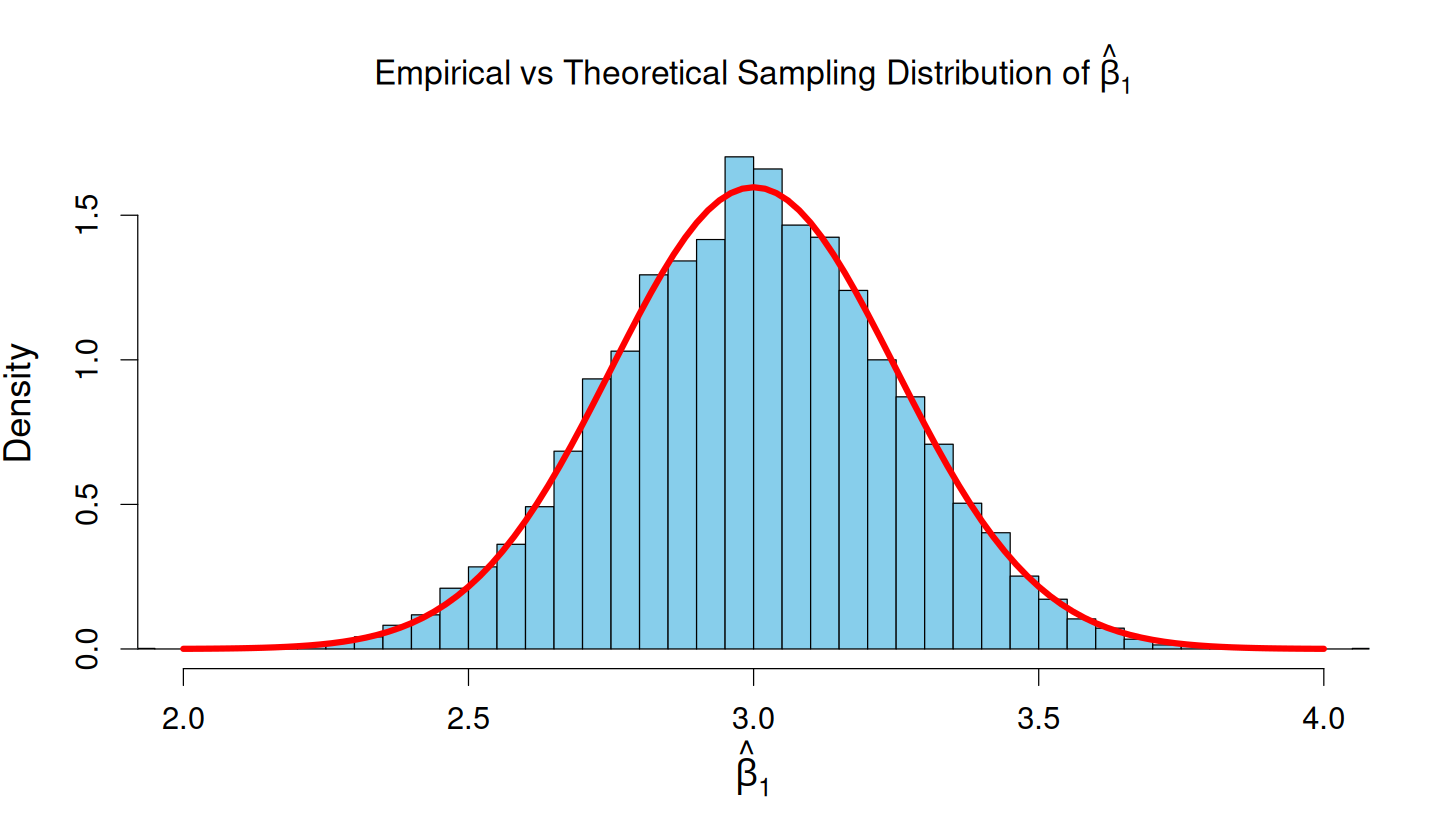

In [5]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Plot histogram of sampling distribution
hist(beta.1.hat, probability=TRUE, col="skyblue", ylim=c(0,1.7), xlim=c(2,4), 
    breaks=50, main=expression("Empirical vs Theoretical Sampling Distribution of " * hat(beta)[1]),
    xlab=expression(hat(beta)[1]))

# Add a normal density curve with the theoretical mean and standard error
curve(dnorm(x, mean=th.mean, sd=sqrt(th.var)), col="red", lwd=5, add=TRUE)

So, the main take-away here is that the theory works and the form of the sampling distribution for $\hat{\beta}_{1}$ is known. Importantly, this can be derived mathematically, without the need for simulation, though it is important to recognise that this depends upon the population distribution being normal[^cltfoot].

### Understanding the Expected Value
As already mentioned, the expected value of the sampling distribution is important in order to determine whether our estimation method is *biased*. For the derivation above, we have

$$
E\left(\hat{\beta}_{1}\right) = \beta_{1}.
$$

As such, we expect that, on average across samples, our estimate will be equal to the population value. Going back to the dartboard analogy, this would be akin to our throws mainly clustering on or around the bullseye, meaning that, on average, we have hit the bullseye[^jokefoot]. A *biased* estimate, on the other hand, would be one where our throws are consistently clustering around a point that is *not* our target. On average, we will therefore get the wrong answer. We have seen this previously when discussing the variance estimate from MLE. As such, our desire is generally for an estimate that is *unbiased* so that we have some theoretical guarantee that we will be accurately estimating the population value over repeated experimentation. Notice that this implicitly embeds the idea of *replication* in order to accurately estimate the population value.

### Understanding the Standard Error
As also mentioned above, the standard error is the name given to the standard deviation of the sampling distribution. This quantity is particularly important because it tells us, on average, how much we expect our estimate to differ from the true value. If this is *small*, then we have confidence that our estimate is likely to be close to the true value. However, if this is *large*, then we have much less confidence when interpreting our estimate, as it may actually be quite far from the true value. 

For the derivation above, the standard error (SE) is

$$
\text{SE}\left(\hat{\beta}_{1}\right) = \sqrt{\text{Var}\left(\hat{\beta}_{1}\right)} =  \sqrt{\frac{\sigma^{2}}{\sum{\left(x_{i} - \bar{x}\right)^{2}}}}.
$$

This looks a bit complicated, so let us work through the logic. For the moment, ignore the square-root because this just changes the units from squared distances into the original units of the data. The important element of the SE is that we are *scaling* the error variance by $\sum{\left(x_{i} - \bar{x}\right)^{2}}$. This captures the *spread* of the $x$-values. So we are dividing the spread of the data *vertically* (the error variance) by the spread of the data *horizontally*. Or, to look at this another way, the ratio of the *noise* to the *signal*. 

#### Why Does the Spread of $x$ Matter?
To get a better idea of why the spread of $x$-values is important, we can run some simulations in `R`. In each instance, we simulate data using known population parameters, fixing $n = 30$, $\beta_{0} = 0$, $\beta_{1} = 2$ and $\sigma = 5$. The only difference is that in the *low-spread* simulations we fix the range of $x$ to $[9.5,10.5]$, whereas in the *high-spread* simulations we fix the range of $x$ to $[0,20]$. The results are shown below for 4 repeats of both the *low-spread* and *high-spread* situations, where the true regression line is shown as a dashed line and the estimated regression line is shown as a solid blue line. Again, you can expand the box to view the code, but the more important element here is the output.

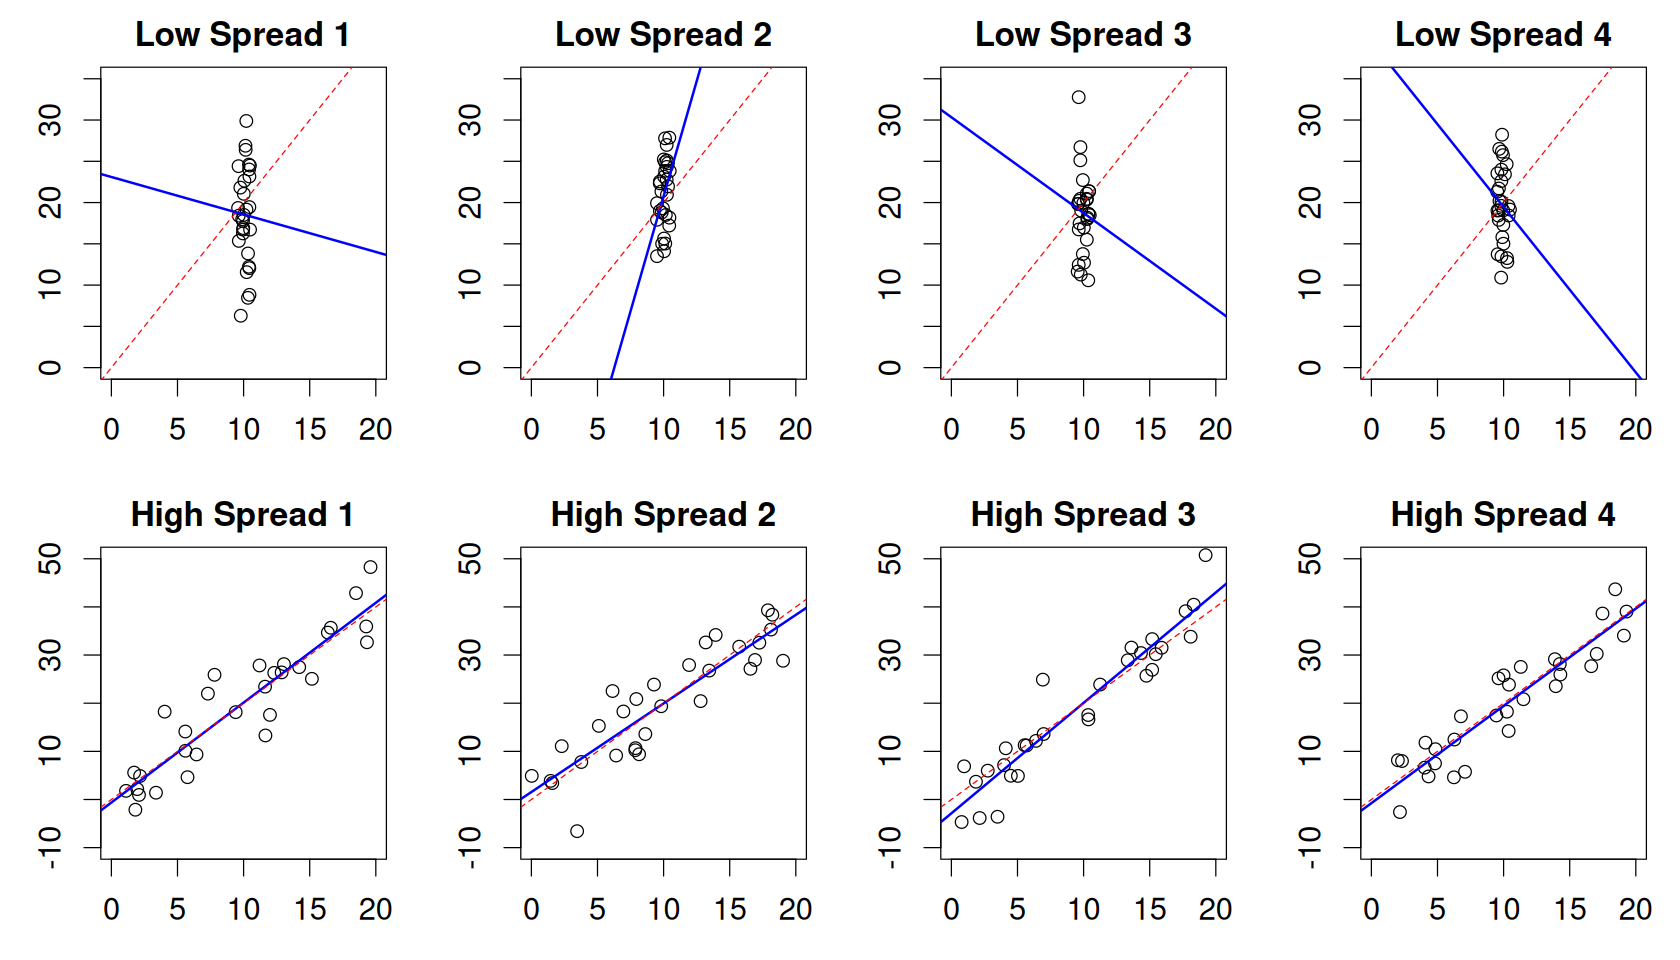

In [3]:
set.seed(42)

# Plot size
options(repr.plot.width=14, repr.plot.height=8)

# Parameters
n      <- 30
beta.0 <- 0
beta.1 <- 2
sigma  <- 5
n.reps <- 4

# Layout and scaling
par(mfrow=c(2,4), mar=c(3,3,2,1))
par(cex.lab=1.3, cex.axis=1.1, cex=1.4)

# Low spread sims
for (i in 1:n.reps) {
  x.l   <- runif(n, 9.5, 10.5)
  y.l   <- rnorm(n, mean=beta.0 + beta.1 * x.l, sd=sigma)
  fit.l <- lm(y.l ~ x.l)
  title <- paste("Low Spread",i)
  
  plot(x.l, y.l, main=title, xlab="", ylab="", xlim=c(0,20), ylim=c(0,35))
  abline(fit.l, col="blue", lwd=2)         # Estimated line
  abline(beta.0, beta.1, col="red", lty=2) # True line
}

# Low spread sims
for (i in 1:n.reps) {
  x.h   <- runif(n, 0, 20)
  y.h   <- rnorm(n, mean=beta.0 + beta.1 * x.h, sd=sigma)
  fit.h <- lm(y.h ~ x.h)
  title <- paste("High Spread",i)
  
  plot(x.h, y.h, main=title, xlab="", ylab="", xlim=c(0,20), ylim=c(-10,50))
  abline(fit.h, col="blue", lwd=2)         # Estimated line
  abline(beta.0, beta.1, col="red", lty=2) # True line
}

Notice that when the spread of $x$ is very low, the estimate of the regression line is wildly unstable. This is because, with limited information about $x$, the fit is mostly influences by small changes in the vertical spread of the data. In other words, there is very little *signal* relative to the *noise*. The degree to which our estimate differs from the truth is therefore much larger and the SE will be much bigger. By comparison, when the spread of $x$ is much higher, the estimate of the regression line is much more stable and corresponds much more closely to the true value. As such, the SE will be much lower.


```{admonition} Experimental Optimisation I
:class: tip
The dependence of the standard error on the range of values for $x$ provides important information for optimising experiments. Although the predictor variables are not always under our direct control, considerations should be made about whether a good range of $x$ values are available. For instance, if we are directly interested in relationships with `age` as a predictor, having a sample that ranges from 20 years old to 21 years old will likely not provide enough information. Sampling more widely and trying to achieve a good spread between 20 years old and 50 years would likely produce much more stable and meaningful estimates.
```

#### Dependence on Sample Size
Beyond the importance of the range of $x$ values, another element of great importance is the *amount* of data that we have. In the definition of the SE, notice that the value in the denominator is a *sum*, rather than an average. As such, it gets bigger as we collect more data. Although slightly hidden in the formula above, we can make this more explicit by writing

$$
\text{Var}\left(\hat{\beta}_{1}\right) = \frac{\sigma^{2}}{(n-1)\sigma^{2}_{x}},
$$

where $\sigma^{2}_{x}$ indicates the variance of $x$. The multiplication of the $(n-1)$ term essentially undoes the averaging when calculating the variance of $x$

$$
(n-1)\sigma^{2}_{x} = (n-1) \frac{\sum{(x_{i} - \bar{x})^{2}}}{n-1} = \sum{(x_{i} - \bar{x})^{2}},
$$

so it is a bit redundant writing it this way. However, doing so makes the dependence on the sample size clearer. To put it simply, the *bigger* the sample size the *larger* the denominator becomes and the *smaller* the standard error. To put it even more simply, *more data* makes our estimate *more precise*.

This makes intuitive sense. The more data we have, the closer we are to having the full population at our disposal and thus the better our estimate of the population value should be. To make our estimate as precise as possible we want both a wide-spread of $x$ values, as well as more data. We can demonstrate this dependance in `R` using simulations. The output below shows the sampling distribution of $\hat{\beta}_{1}$ for sample sizes of 5, 10, 50, 100, 1000 and 5000. Again, the code is hidden, but you can study it if you like to get a clearer idea of how these simulations work.

In [5]:
options(repr.plot.width=14, repr.plot.height=12)

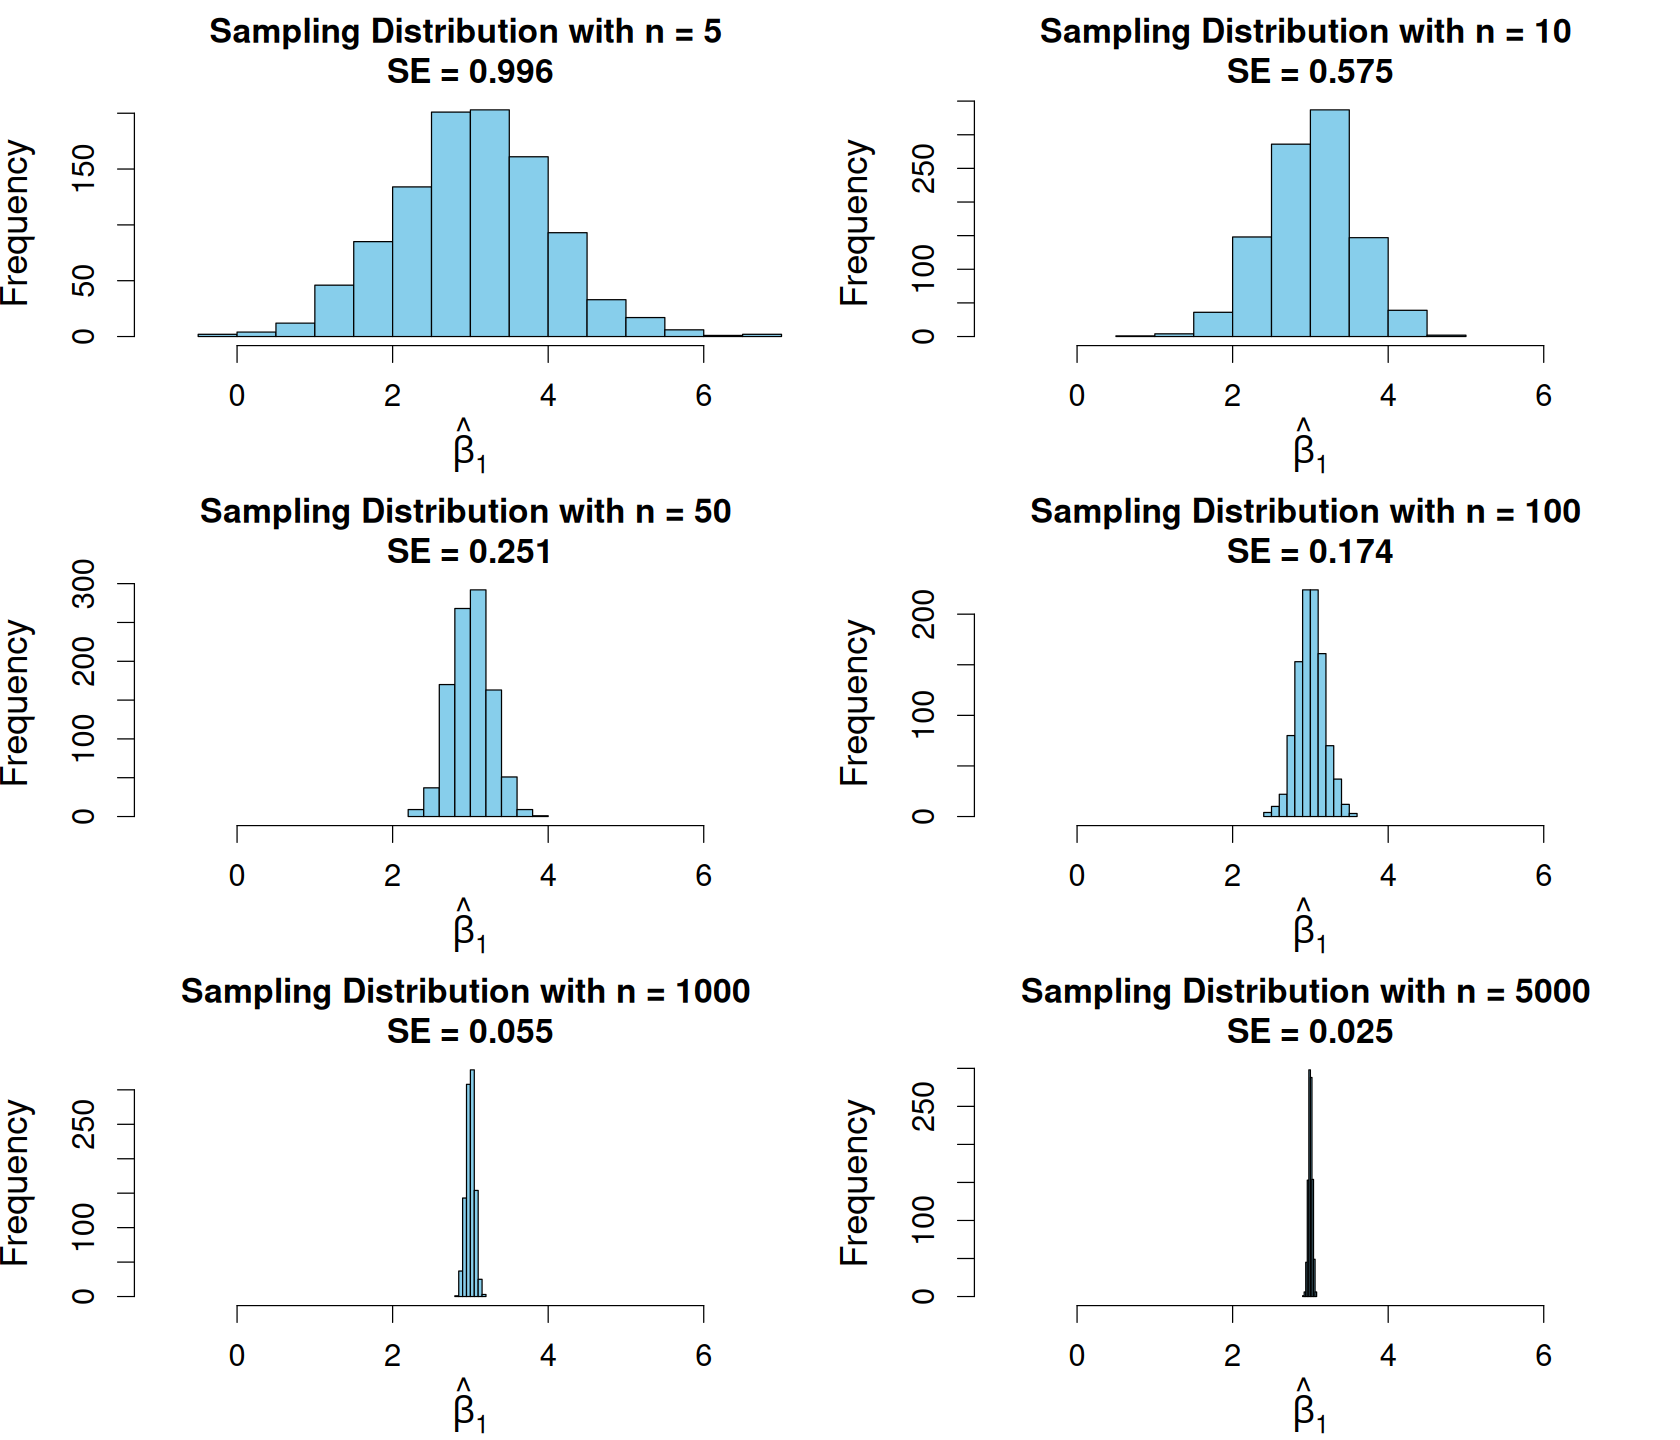

In [6]:
set.seed(777)

beta.0     <- 2
beta.1     <- 3
sigma      <- 5
n.sims     <- 1000
n          <- c(5,10,50,100,1000,5000)

# Layout and scaling
par(mfrow = c(3,2), mar=c(4,4,3,1))
par(cex.lab=1.3, cex.axis=1.1, cex=1.4)

for (i in 1:length(n)){
    x       <- runif(n[i],0,10)
    b.1.hat <- rep(0,n.sims)

    for (j in 1:n.sims){
        y          <- rnorm(n[i], mean=beta.0 + beta.1*x, sd=sigma)
        b.1.hat[j] <- coef(lm(y ~ x))[2]
    }

    std.err <- round(sd(b.1.hat),3)
    title   <- paste("Sampling Distribution with n =", n[i], "\nSE =", std.err)
    xlab    <- expression(hat(beta)[1])  
    hist(b.1.hat, xlim=c(-1,7), main=title, col="skyblue", xlab=xlab)
}

The shrinking width of the sampling distribution as $n$ increases should be very clear. Although each of these distributions are centred on the true value, their variability differs wildly. As such, our confidence in the precision of our estimates changes dramatically as we get more and more data. When $n = 5$, we expect our estimate to differ from the true value by an average of 0.996 units. However, when $n = 5000$, we expect our estimate to differ from the true value by an average of 0.025 units. It should be clear that we are more likely to trust our estimate to be close to the true value when we have more data.


```{admonition} Experimental Optimisation II
:class: tip
The dependence of the standard error on the sample size provides even more important information for optimising experiments. Although we want a wide-range of values for $x$, we also want as much data as possible. A dataset where we only have a single measurement for each value of $x$ is not going to be as useful as a dataset with 20 measurements for each value of $x$. So, ideally, we want *both* a large sample size and a large spread of $x$ values. The importance of *both* these elements is often under-appreciated in practice, where researchers tend to fixate on sample size above everything else. However, a larger sample across a narrow range of $x$ could end up being equivalent to a smaller sample across a wider range of $x$ in terms of the value of the SE. Indeed, in the example in the table below, an experiment with $n=20$ is better than an experiment with $n=50$, when coupled with a larger range of values for $x$.

| Design   |   $n$  | $\text{Var}\left(x\right)$ | $n \times \text{Var}\left(x\right)$ |
|----------|--------|----------------------------|-------------------------------------|
| Design A | 50     | 4                          | 200                                 |
| Design B | 20     | 15                         | 300                                 |

Of course, bigger samples come with other benefits, but it is important to recognise that there is an inherent trade-off here and that bigger samples, as far as the SE is concerned, are not always better.
```

### What About the Intercept and Variance?
We have now spent some time discussing the sampling distribution of $\hat{\beta}_{1}$, but what about the sampling distributions of $\hat{\beta}_{0}$ and $\hat{\sigma}^{2}$? Like $\hat{\beta}_{1}$, under assumptions of population normality, these can be derived mathematically to give:

$$
\begin{align*}
    \hat{\beta}_{0} &\sim \mathcal{N}\left(\beta_{0}, \sigma^{2}\left[\frac{1}{n} + \frac{\bar{x}^{2}}{\sum{(x_{i} - \bar{x})^{2}}}\right]\right) \\
    \hat{\sigma}^{2} &\sim \frac{\sigma^{2}}{n-2} \cdot \chi^{2}\left(n-2\right)
\end{align*}
$$

These looks more complex than the slope. However, we can see that the intercept is also normal and *unbiased*, with a standard error that still relies on the spread of $x$ (albeit, in a more complicated form). The variance is distributed as a scaled $\chi^{2}$ with parameter $k = n-2$. This *is* more complex than the distributions for the slope and intercept, but we do not need to worry about it right now. The relevance of this will come into play when we discuss the creation of *test statistics* in the next part of the lesson.

### What About Multiple Rgression?
We have seen the sampling distributions in *simple* regression, but what about *multiple* regression? The good news is that most of the theory stays the same. The only element that differs is the standard error. This is a consequence of the discussion we had last week about multiple regression coefficients represents the variance of a predictor *after* taking all other predictors into account. The sampling distribution for the slope estimate $j$ in multiple regression is

$$
\hat{\beta}_{j} \sim \mathcal{N}\left(\beta_{j},\frac{\sigma^{2}}{\sum{\left(x_{ij} - \bar{x}_{j}\right)^{2} \cdot \left(1 - R^{2}_{j}\right)}}\right).
$$

This is largely the same as before, except that the spread in $x_{j}$ is now multiplied by the term $(1 - R^{2}_{j})$. For now, we can think of this as an adjustment for how correlated predictor $j$ is with all other predictors in the model. The bigger this is, the smaller $(1 - R^{2}_{j})$ becomes and the more that the spread of $x_{j}$ is made *smaller*. As such, the greater the correlation, the *larger* the standard error. We will discuss the intuition behind this when we cover *multicollinearity* next week.

## Estimation Uncertainty in `R`
As a final part to this section, we can see how `R` reports the uncertainty of all the estimates from a multiple regression fit using the `lm()` function. Here, we will return to the `mtcars` example and fit the model `mpg ~ wt + hp + disp`.

In [11]:
data(mtcars)
mod <- lm(mpg ~ wt + hp + disp, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


For each one of the slopes (and the intercept) we have a report of both the `Estimate` and the `Std. Error`. Let us work through each slope and see how we could interpret each estimate in light of its uncertainty. Note that we will see ways of formalising this in the next section. This is just an example of how this information can be used to assess the precision of our estimates in a more general fashion.

### Interpreting `wt`
Starting with `wt`, we can see that, for each unit increase, we have an estimated *decrease* of 3.80 MPG. The SE is reported as 1.07, meaning that on average we expect this estimate to be around 1.07 MPG off from the true value. The estimate is therefore *larger* than its uncertainty, suggesting some reasonable degree of precision. By adding or subtracting the SE from the estimate, we can derive a plausible range of slopes within $\left[-4.88, -2.72\right]$, all of which seem to be indicative of *some* negative relationship between `wt` and `mpg`. These ranges are plotted below (as an added-variable plot), where the estimated line is shown as a dashed line, with the upper and lower limits based on $\pm 1 \times \text{SE}$ shown as coloured lines.

In [13]:
options(repr.plot.width=12, repr.plot.height=7)

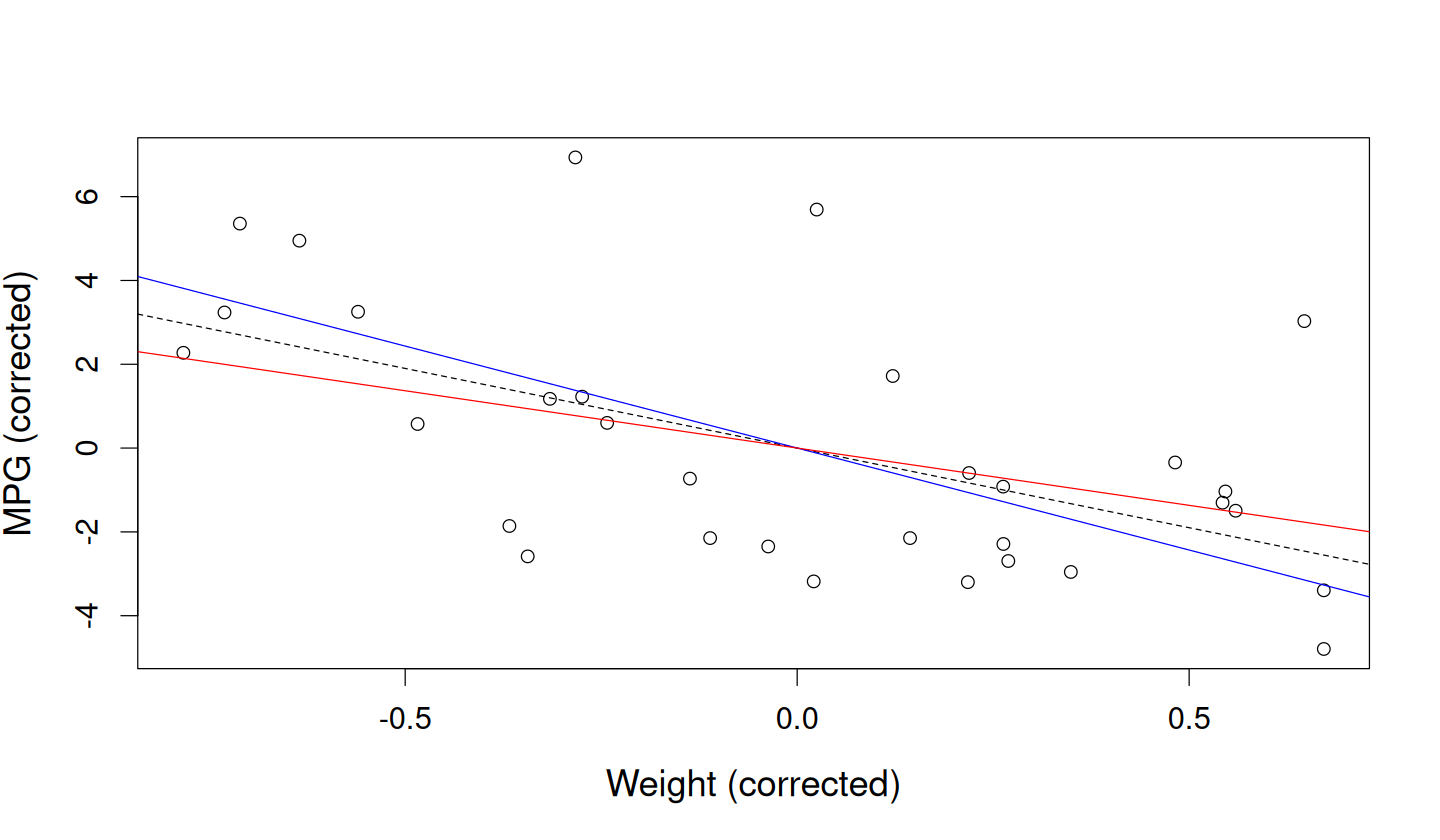

In [17]:
wt.resid  <- resid(lm(wt  ~ hp + disp, data=mtcars))
mpg.resid <- resid(lm(mpg ~ hp + disp, data=mtcars))
  
SE    <- summary(model)$coefficients["wt", "Std. Error"]
lower <- coef(mod)[2] - SE 
upper <- coef(mod)[2] + SE

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # Plot scale
plot(wt.resid, mpg.resid, xlab="Weight (corrected)", ylab="MPG (corrected)")
abline(0, coef(mod)[2], col="black", lty=2) # Estimated line
abline(0, lower, col="blue") # Line - 1*SE
abline(0, upper, col="red")  # Line + 1*SE

### Interpreting `hp`
A similar descriptive assessment can be made for `hp`, where the estimate is again *larger* than its uncertainty, with a plausible range of $\left[-0.043,-0.020\right]$. As with `wt`, this appears to indicate some plausible negative relationship. Again, we can plot the ranges below to give a visual sense of this interpretation.

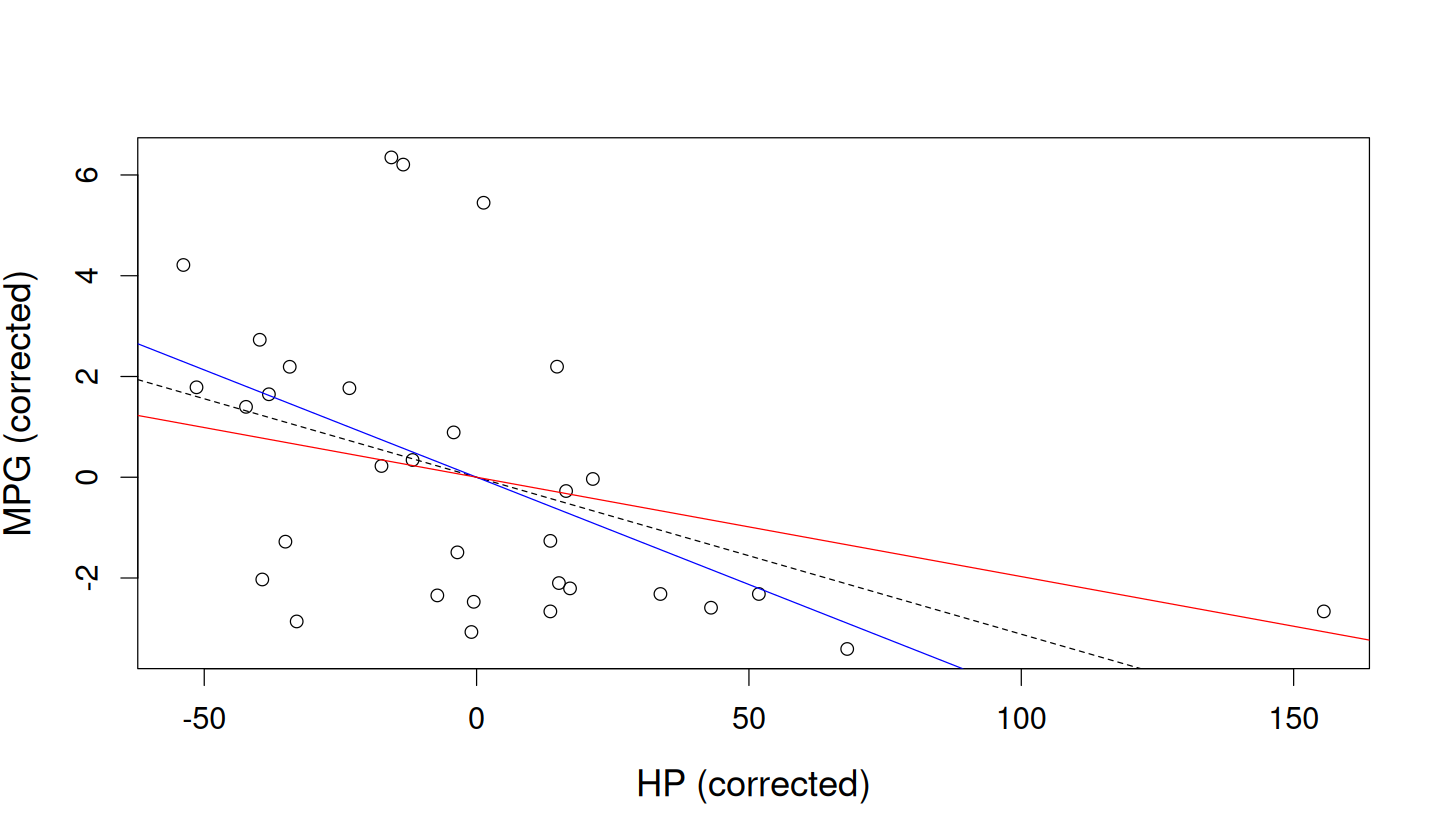

In [20]:
hp.resid  <- resid(lm(hp  ~ wt + disp, data=mtcars))
mpg.resid <- resid(lm(mpg ~ wt + disp, data=mtcars))
  
SE    <- summary(model)$coefficients["hp", "Std. Error"]
lower <- coef(mod)[3] - SE 
upper <- coef(mod)[3] + SE

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # Plot scale
plot(hp.resid, mpg.resid, xlab="HP (corrected)", ylab="MPG (corrected)")
abline(0, coef(mod)[3], col="black", lty=2) # Estimated line
abline(0, lower, col="blue") # Line - 1*SE
abline(0, upper, col="red")  # Line + 1*SE


### Interpreting `disp`
A different story emerges with `disp`. Here the estimate is actually *smaller* than its uncertainty, with the estimate itself close to 0. The plausible range is then $\left[-0.011, 0.010\right]$, which includes a *reversal* of the effect. This indicates a clear lack of precision about both the *direction* and *magnitude* of the true slope value. This can again be seen visually below, where the estimated slope is flat and the upper and lower slopes change direction.

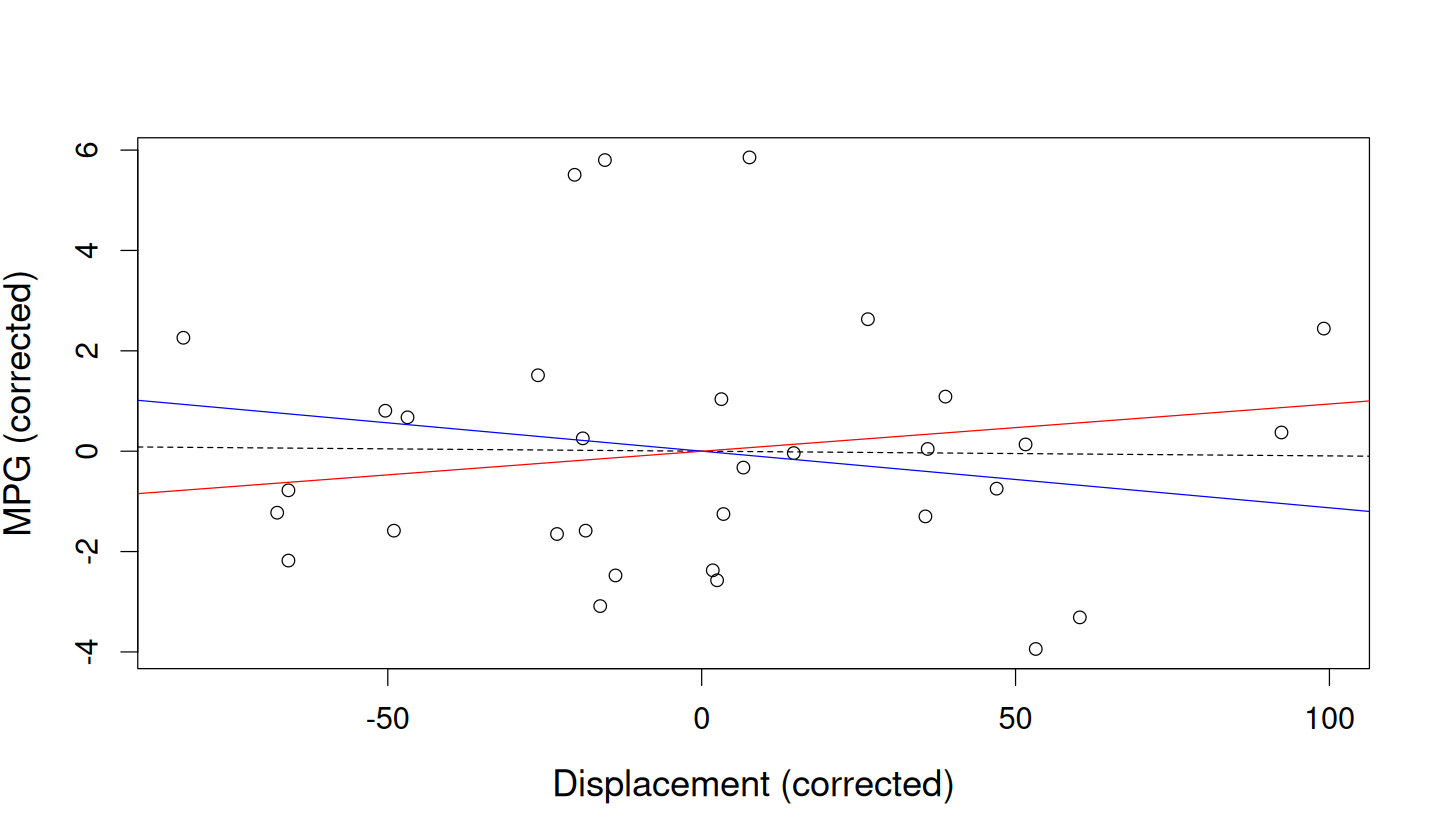

In [21]:
disp.resid  <- resid(lm(disp ~ wt + hp, data=mtcars))
mpg.resid   <- resid(lm(mpg  ~ wt + hp, data=mtcars))
  
SE    <- summary(model)$coefficients["disp", "Std. Error"]
lower <- coef(mod)[4] - SE 
upper <- coef(mod)[4] + SE

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # Plot scale
plot(disp.resid, mpg.resid, xlab="Displacement (corrected)", ylab="MPG (corrected)")
abline(0, coef(mod)[4], col="black", lty=2) # Estimated line
abline(0, lower, col="blue") # Line - 1*SE
abline(0, upper, col="red")  # Line + 1*SE

`````{topic} What do you now know?
In this section, we have explored how uncertainty in the estimation of population parameters can be quantified. After reading this section, you should have a good sense of:

- The concept that parameter *estimates* are random variables with some sampling distribution. 
- How the *mean* and *variance* of these sampling distributions characterise the *bias* and *variance* of our estimates (thinking of the dartboard analogy).
- How the standard deviation of a sampling distribution is known as the *standard error*, and why this differs from the raw standard deviation of a dataset.
- How the sampling distributions of the estimates in linear models are known, as a consequence of assuming a normal population distribution.
- Why the estimates in linear model are considered *unbiased*.
- How the standard error of the estimates scales with both the spread of $x$ and the sample size.
`````

[^jokefoot]: Three statisticians go deer hunting with bows and arrows. They spot a big buck and take aim. One shoots and his arrow flies off three meters to the right. The second shoots and his arrow flies off three meters to the left. The third statistician jumps up and down yelling: "We got him! We got him!".

[^cltfoot]: This reliance on normality is not always needed. As we will explore next week, the central limit theorem indicates that under large-enough sample sizes, the sampling distribution will be normal, even if the population distribution is not.

[^empirfoot]: Empirical means that we have derived the values from real data or simulation, as opposed to *theoretical* values which can be calculated using known formulas.